<a href="https://colab.research.google.com/github/NataliiaPyrih/CodSoft/blob/main/IndianMovies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDb Movies India.csv', encoding='iso-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.nunique ()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

##Data Cleaning

Working with duplicates

In [ ]:
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

Changing data types, cleaning text data

In [ ]:
df['Name'].unique()

array([' ', '#Gadhvi (He thought he was Gandhi)', '#Homecoming', ...,
       'Zulmi Raj', 'Zulmi Shikari', 'Zulm-O-Sitam'], dtype=object)

In [ ]:
df.loc[df['Name'] == ' ', 'Name'] = np.NaN

In [ ]:
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))

In [ ]:
df['Votes']=df['Votes'].str.replace(',', '')
df['Votes']=df['Votes'].str.replace('$','').str.replace('M', '')
df['Votes']=df['Votes'].astype('float')

<Axes: >

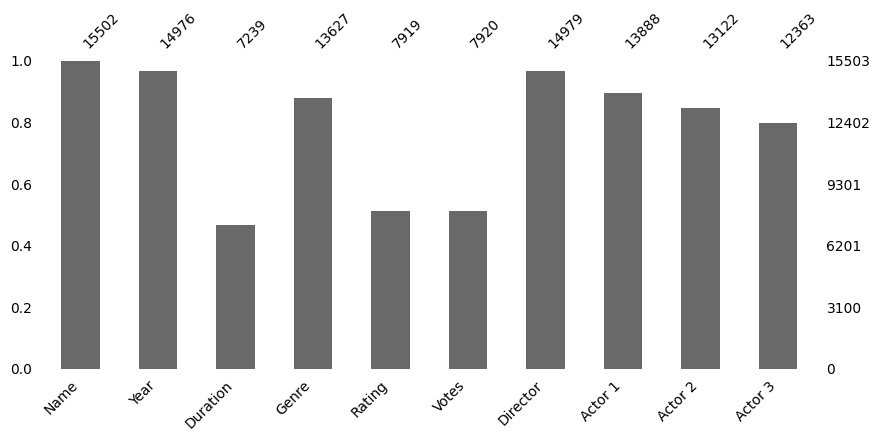

In [ ]:
msno.bar(df, figsize=(10,4), fontsize=10)

<Axes: >

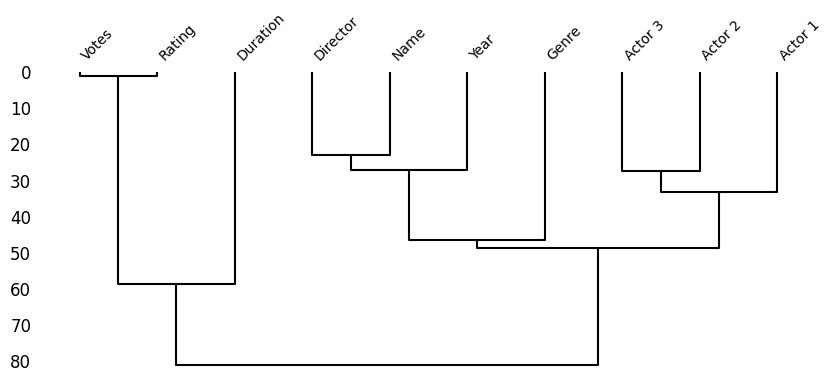

In [ ]:
msno.dendrogram(df, figsize=(10,4), fontsize=10)

In [ ]:
df.isna().sum()

Name           1
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

The first way to deal with missing data is to delete records with missing data in the Rating column

In [ ]:
df_delRat=df.copy()

In [ ]:
df_delRat=df_delRat.dropna(subset="Rating")
df_delRat.isna().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [ ]:
rows_with_missing_values1 = df_delRat[['Duration', 'Genre', 'Actor 1', 'Actor 2', 'Actor 3']].isnull().all(axis=1)
missing_subset1= df_delRat.loc[rows_with_missing_values1]
missing_subset1.shape

(14, 10)

In [ ]:
df_delRat=df_delRat[~rows_with_missing_values1]
df_delRat.isna().sum()

Name           0
Year           0
Duration    2054
Genre         88
Rating         0
Votes          0
Director       5
Actor 1      111
Actor 2      186
Actor 3      278
dtype: int64

<Axes: >

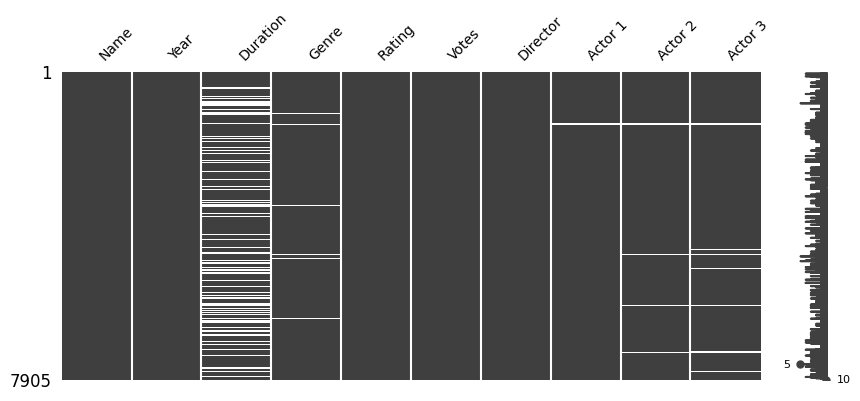

In [ ]:
msno.matrix(df_delRat, figsize=(10,4), fontsize=10)

In [ ]:
values = {"Director":"Unknown", "Actor 1": "Unknown", "Actor 2": "Unknown", "Actor 3": 'Unknown'}
df_delRat.fillna(value=values, inplace=True)
df_delRat.isna().sum()

Name           0
Year           0
Duration    2054
Genre         88
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [ ]:
df_delRat['Genre']=df_delRat['Genre'].fillna(df_delRat['Genre']).value_counts().index[0]
df_delRat.isna().any()

Name        False
Year        False
Duration     True
Genre       False
Rating      False
Votes       False
Director    False
Actor 1     False
Actor 2     False
Actor 3     False
dtype: bool

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [ ]:
df_delRat[['Duration']]=imputer.fit_transform(df_delRat[['Duration']])
df_delRat.isna().any()

Name        False
Year        False
Duration    False
Genre       False
Rating      False
Votes       False
Director    False
Actor 1     False
Actor 2     False
Actor 3     False
dtype: bool

Second type of dealing with missing data. In order not to reduce the number of records by a factor of 2, different ways of selecting record sets for deletion and imputation techniques are used.

In [ ]:
df_impRat=df.copy()

In [ ]:
rows_with_missing_values = df[['Year','Duration', 'Genre','Rating' ,'Votes','Director','Actor 1', 'Actor 2', 'Actor 3']].isnull().all(axis=1)
missing_subset= df_impRat.loc[rows_with_missing_values]
missing_subset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_impRat=df_impRat[~rows_with_missing_values]
df_impRat.isna().sum()

Name           1
Year         519
Duration    8256
Genre       1868
Rating      7576
Votes       7575
Director     516
Actor 1     1607
Actor 2     2373
Actor 3     3132
dtype: int64

In [ ]:
rows_with_missing_info = df_impRat[['Year','Duration', 'Genre','Rating' , 'Votes']].isnull().all(axis=1)
missing_subset2= df_impRat.loc[rows_with_missing_info]
missing_subset2.shape

(24, 10)

In [ ]:
df_impRat=df_impRat[~rows_with_missing_info]
df_impRat.isna().sum()

Name           1
Year         495
Duration    8232
Genre       1844
Rating      7552
Votes       7551
Director     516
Actor 1     1600
Actor 2     2361
Actor 3     3117
dtype: int64

In [ ]:
rows_with_missing_actors = df_impRat[['Director', 'Actor 1', 'Actor 2', 'Actor 3']].isnull().all(axis=1)
df_impRat=df_impRat[~rows_with_missing_actors]
df_impRat.isna().sum()

Name           1
Year         475
Duration    7730
Genre       1828
Rating      7041
Votes       7040
Director       0
Actor 1     1084
Actor 2     1845
Actor 3     2601
dtype: int64

<Axes: >

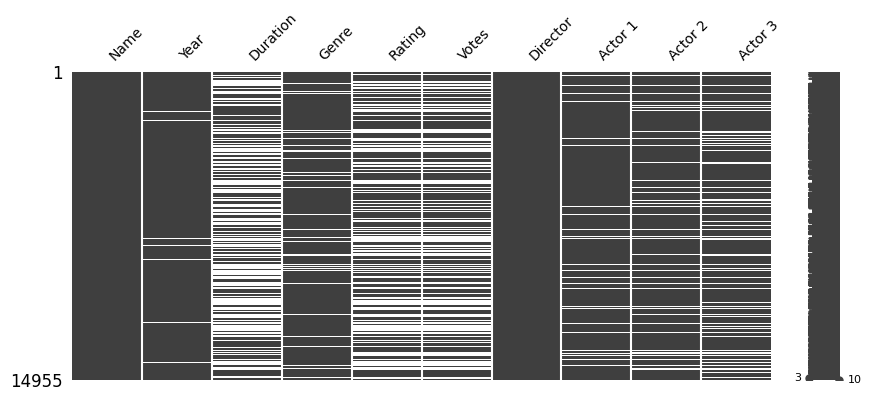

In [ ]:
msno.matrix(df_impRat, figsize=(10,4), fontsize=10)

In [ ]:
drop_subset=df_impRat.columns[(df_impRat.isna().sum()<=len(df_impRat)*0.05) & (df_impRat.isna().sum()!=0)]
drop_subset

Index(['Name', 'Year'], dtype='object')

In [ ]:
df_impRat.dropna(subset=drop_subset, inplace=True)
df_impRat.isna().sum()

Name           0
Year           0
Duration    7379
Genre       1824
Rating      6566
Votes       6565
Director       0
Actor 1      991
Actor 2     1699
Actor 3     2408
dtype: int64

In [ ]:
popular_genre=df_impRat['Genre'].mode()[0]
popular_genre

'Drama'

In [ ]:
df_impRat['Genre'].fillna(popular_genre, inplace=True)
df_impRat['Genre'].isna().any()

False

In [ ]:
df_impRat.fillna(value=values, inplace=True)

In [ ]:
df_impRat[['Duration', 'Rating', 'Votes']] = imputer.fit_transform(df_impRat[['Duration', 'Rating', 'Votes']])
df_impRat.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

The last part of data cleansing. Replacing the numeric data type, where necessary, with an integer data type.

In [ ]:
def changeDtypes(dataFrame):
  dataFrame['Year'] = dataFrame['Year'].str.replace('(', '').str.replace(')', '')
  dataFrame['Year']= dataFrame['Year'].astype('int')
  dataFrame['Votes']=dataFrame['Votes'].astype('int')
changeDtypes(df_delRat)
changeDtypes(df_impRat)
df_delRat['Year'].unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 1946, 2008, 1994, 2007, 2013, 2003,
       1998, 1979, 1956, 1974, 2015, 2006, 1981, 2020, 1985, 2011, 1988,
       1995, 1987, 1996, 1999, 1973, 1968, 1953, 1943, 1986, 1982, 1977,
       1950, 1969, 1948, 1967, 1970, 1990, 1989, 1947, 2001, 2000, 1971,
       1978, 1944, 1963, 1992, 1976, 1984, 1975, 1980, 1966, 1972, 1960,
       1964, 1952, 1959, 1951, 1957, 1954, 1962, 1961, 1965, 1933, 1955,
       1983, 1936, 1940, 1949, 1945, 1938, 1941, 1942, 1932, 1935, 1937,
       1934, 1931, 1917, 1939])

In [ ]:
df_impRat.dtypes

Name         object
Year          int64
Duration    float64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

##Data Visualization

In [ ]:
def plot_comparison(plot_type, data, axes, title='', **kwargs):
  if plot_type=="heatmap":
    sns.heatmap(data.corr(), annot=True, ax=axes).set(title=title)
  elif plot_type=="lineplot":
     sns.lineplot(data=data, x=kwargs['x'], y=kwargs['y'], ax=axes).set(title=title)
  elif plot_type=="scatterplot":
      if 'hue' in kwargs:
        sns.scatterplot(x=kwargs['x'], y=kwargs['y'], hue=kwargs['hue'], data=data, ax=axes).set(title=title)
      else:
        sns.scatterplot(x=kwargs['x'], y=kwargs['y'], data=data, ax=axes).set(title=title)
  elif plot_type =="barplot":
    sns.barplot(x=kwargs['x'], y=kwargs['y'], data=data, ax=axes).set(title=title)
  elif plot_type=="regplot":
    sns.regplot(x=kwargs['x'], y=kwargs['y'], data=data, ax=axes).set(title=title)

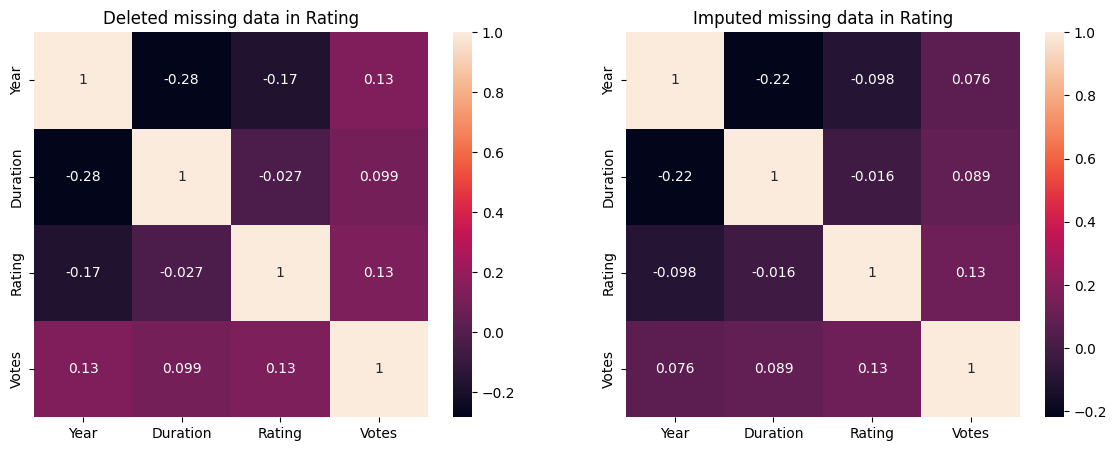

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,5))
plot_comparison('heatmap', df_delRat, axs[0], 'Deleted missing data in Rating')
plot_comparison('heatmap', df_impRat, axs[1], 'Imputed missing data in Rating')
plt.show()

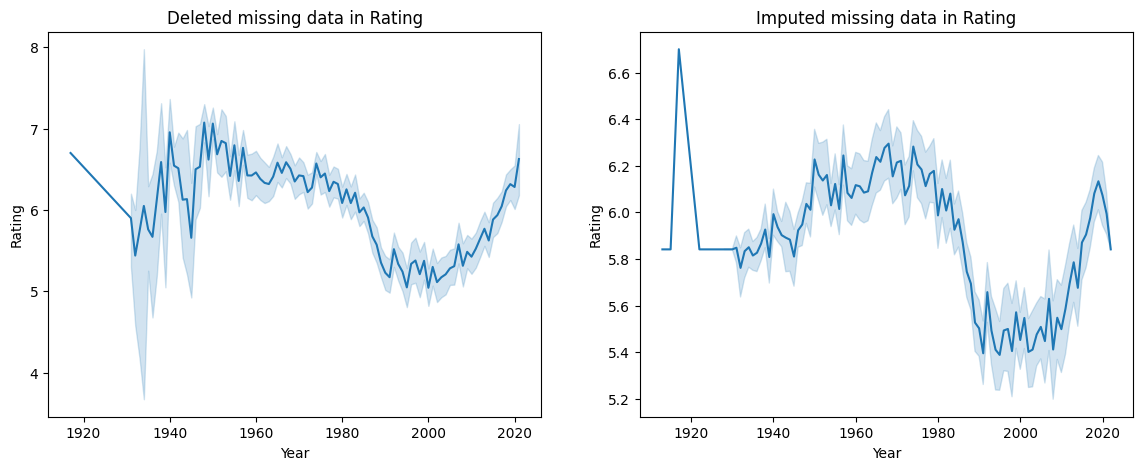

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,5))
plot_comparison('lineplot', df_delRat, axs[0], 'Deleted missing data in Rating', x='Year', y='Rating')
plot_comparison('lineplot', df_impRat, axs[1], 'Imputed missing data in Rating', x='Year', y='Rating')
plt.show()

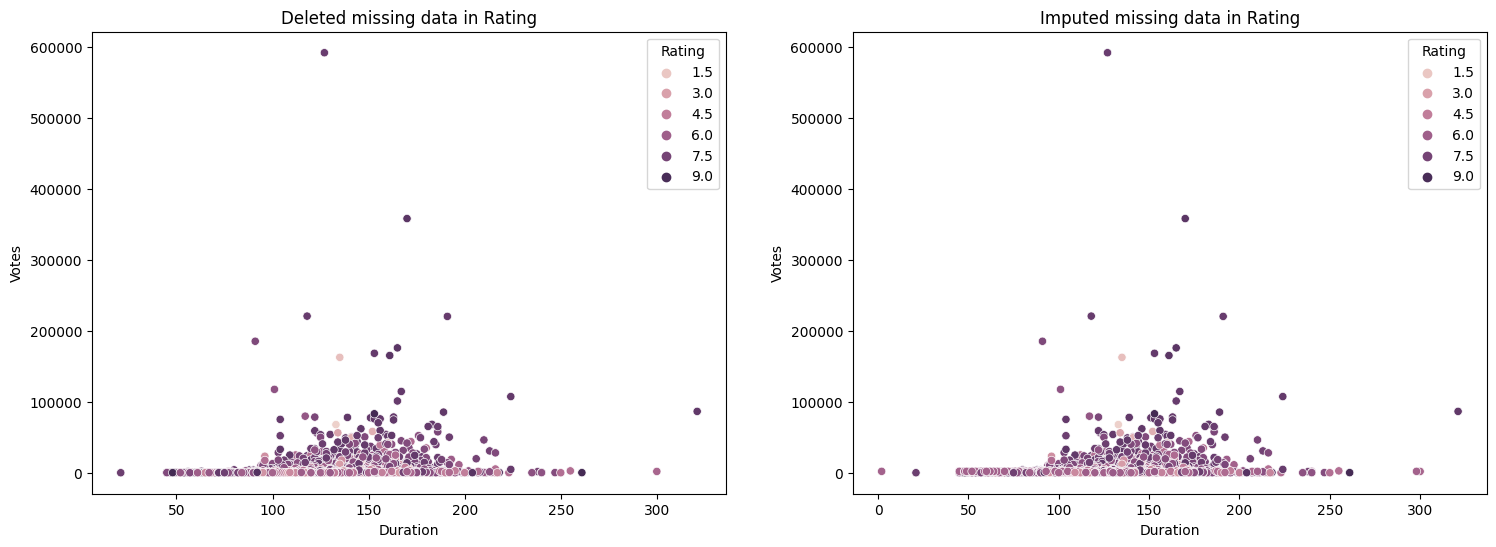

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18,6))
plot_comparison('scatterplot', df_delRat, axs[0], 'Deleted missing data in Rating', x='Duration', y='Votes', hue='Rating')
plot_comparison('scatterplot', df_impRat, axs[1], 'Imputed missing data in Rating', x='Duration', y='Votes', hue='Rating')
plt.show()

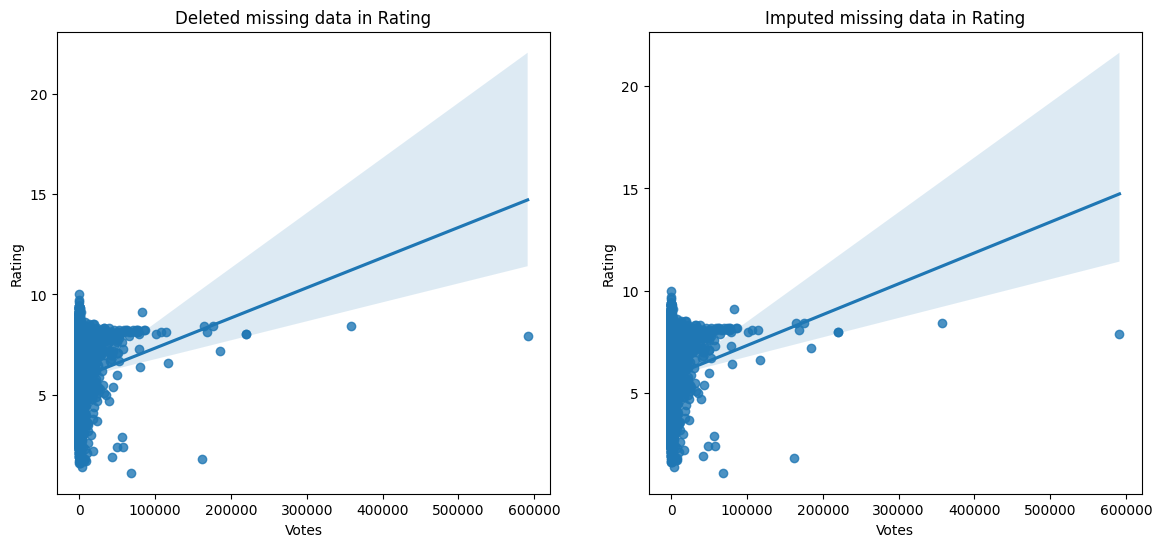

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))
plot_comparison('regplot', df_delRat, axs[0], 'Deleted missing data in Rating', x='Votes', y='Rating')
plot_comparison('regplot', df_impRat, axs[1], 'Imputed missing data in Rating', x='Votes', y='Rating')
plt.show()

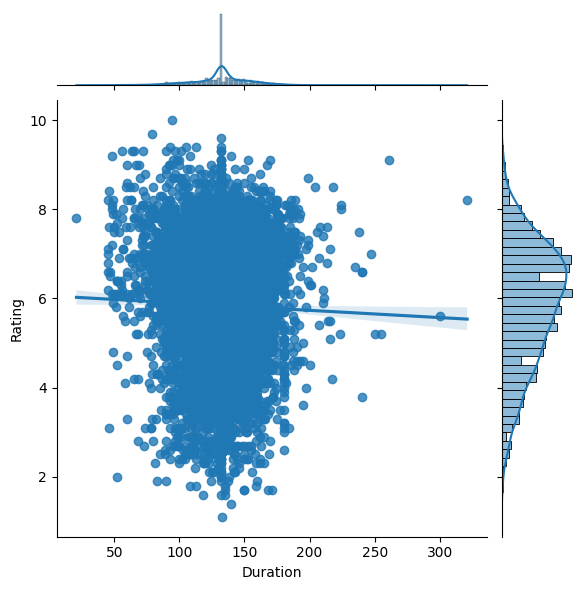

In [ ]:
sns.jointplot(data=df_delRat, x='Duration', y='Rating', kind="reg")

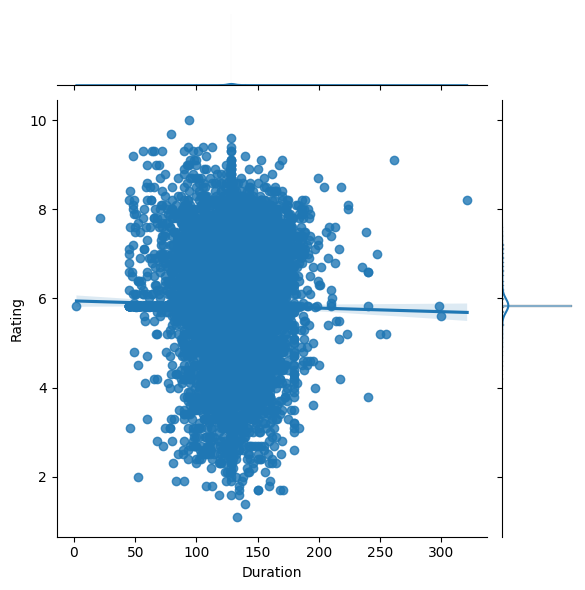

In [ ]:
sns.jointplot(data=df_impRat, x='Duration', y='Rating', kind="reg")

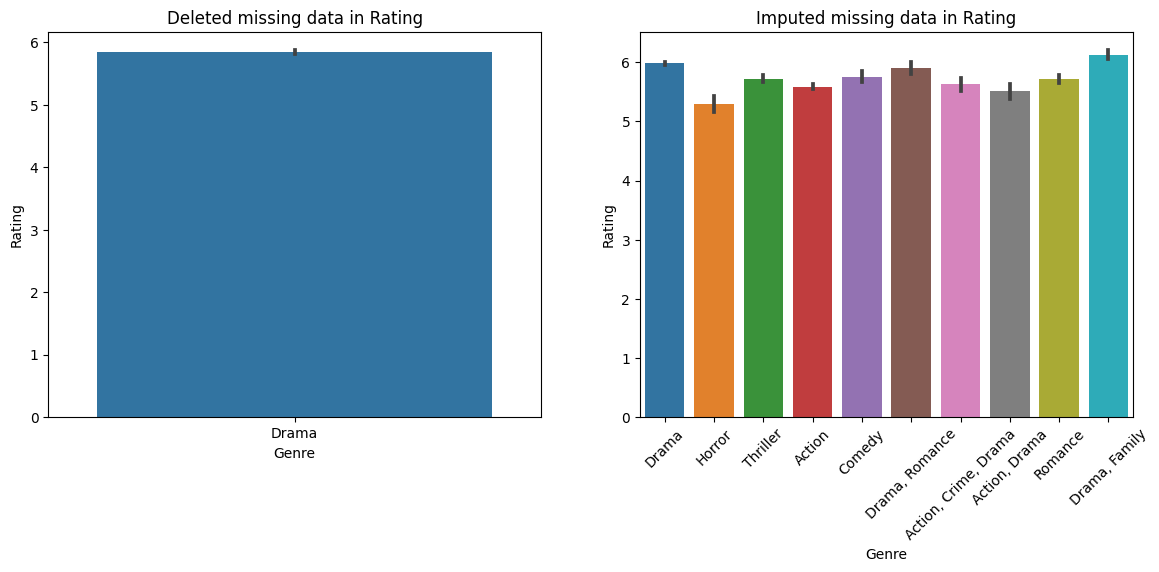

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,5))
plot_comparison('barplot', df_delRat, axs[0], 'Deleted missing data in Rating', x='Genre', y='Rating')
popular_genres = df_impRat['Genre'].value_counts().nlargest(10).index
gen_subset=df_impRat[df_impRat['Genre'].isin(popular_genres)]
plot_comparison('barplot', gen_subset, axs[1], 'Imputed missing data in Rating', x='Genre', y='Rating')
plt.xticks(rotation=45)
plt.show()

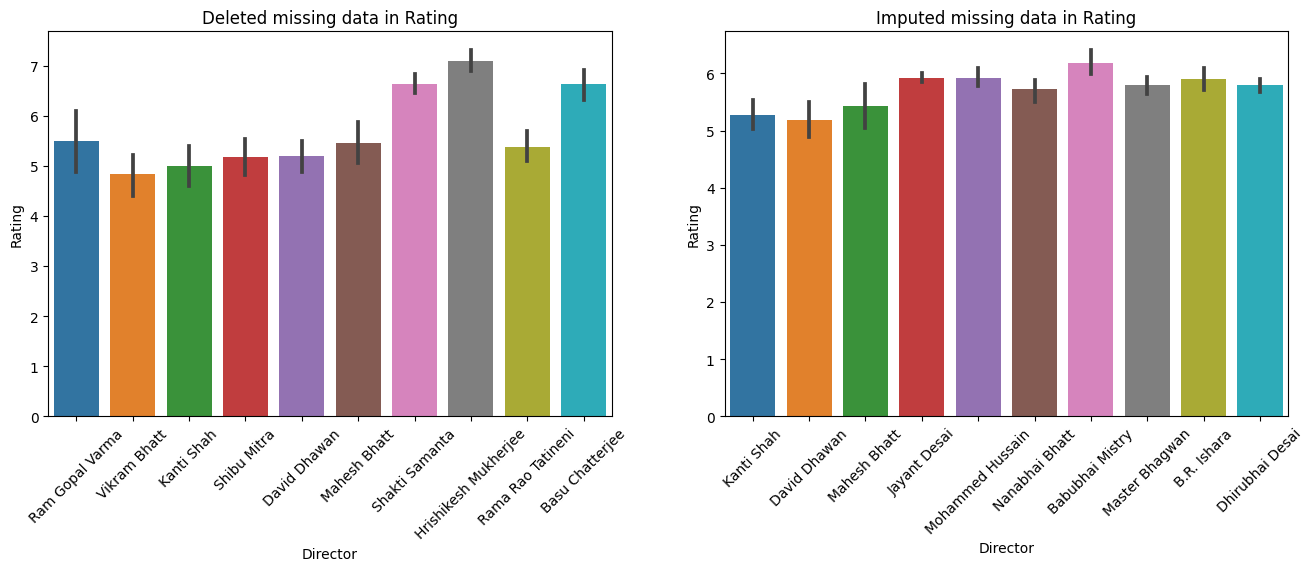

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,5))
top_directors1 = df_delRat['Director'].value_counts().nlargest(10).index
subset1 = df_delRat[df_delRat['Director'].isin(top_directors1)]
top_directors2 = df_impRat['Director'].value_counts().nlargest(10).index
subset2 = df_impRat[df_impRat['Director'].isin(top_directors2)]
plot_comparison('barplot', subset1, axs[0], 'Deleted missing data in Rating', x='Director', y='Rating')
plot_comparison('barplot', subset2, axs[1], 'Imputed missing data in Rating', x='Director', y='Rating')
for ax in axs:
  ax.tick_params(axis='x', labelrotation=45)
plt.show()

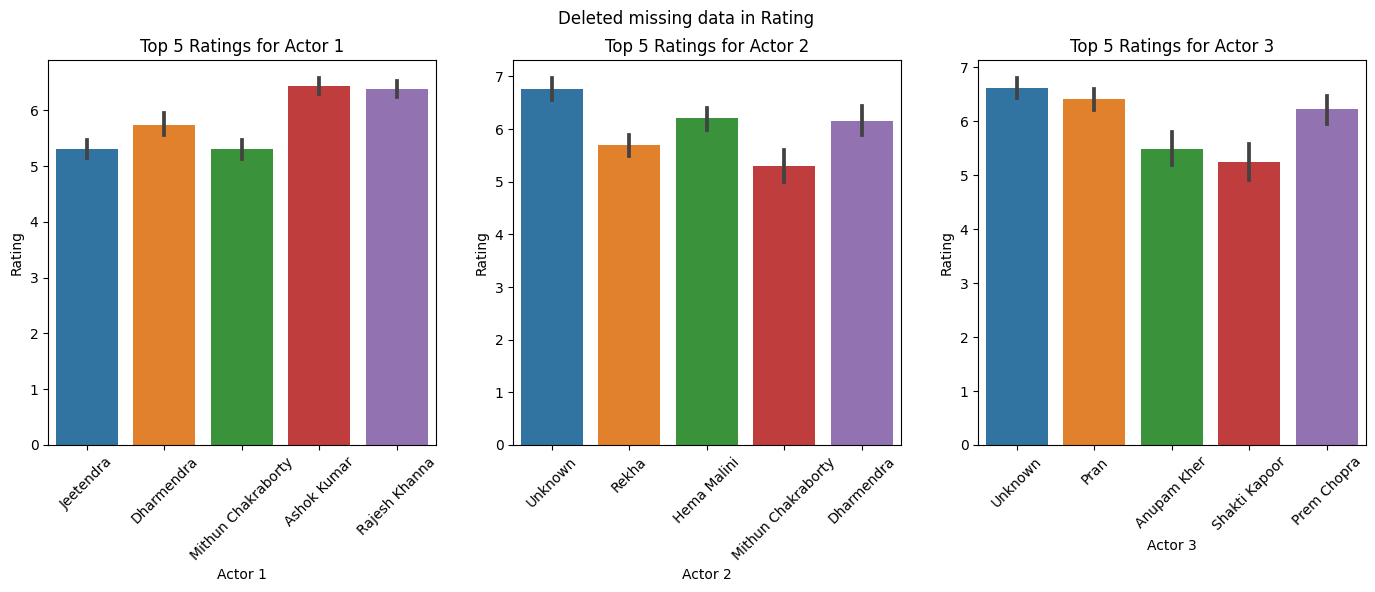

In [ ]:
fig, axs=plt.subplots(1, 3, figsize=(17,5))
for i, actor_col in enumerate(['Actor 1', 'Actor 2', 'Actor 3']):
    top_actors = df_delRat[actor_col].value_counts().nlargest(5).index
    subset = df_delRat[df_delRat[actor_col].isin(top_actors)]
    sns.barplot(x=actor_col, y='Rating', data=subset, order=top_actors, ax=axs[i])
    axs[i].set_title(f'Top 5 Ratings for {actor_col}')
    axs[i].tick_params(axis='x', rotation=45)
plt.suptitle('Deleted missing data in Rating', ha='center')
plt.show()

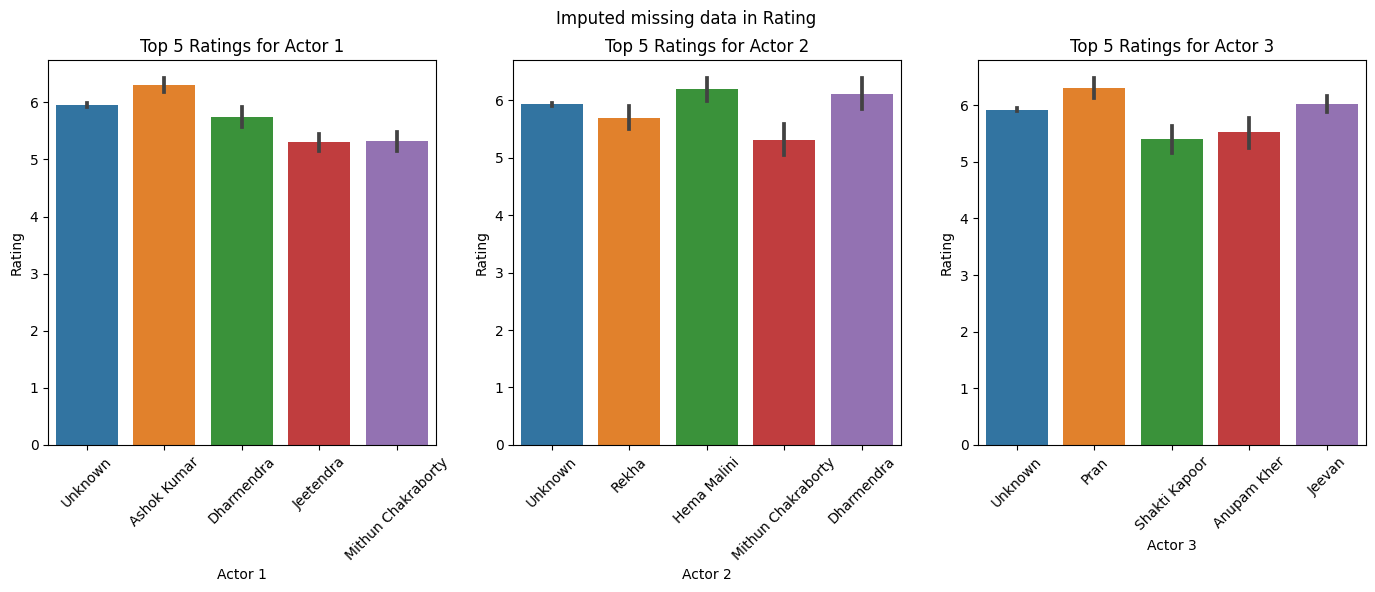

In [ ]:
fig, axs=plt.subplots(1, 3, figsize=(17,5))
for i, actor_col in enumerate(['Actor 1', 'Actor 2', 'Actor 3']):
    top_actors = df_impRat[actor_col].value_counts().nlargest(5).index
    subset = df_impRat[df_impRat[actor_col].isin(top_actors)]

    sns.barplot(x=actor_col, y='Rating', data=subset, order=top_actors, ax=axs[i])
    axs[i].set_title(f'Top 5 Ratings for {actor_col}')
    axs[i].tick_params(axis='x', rotation=45)
plt.suptitle('Imputed missing data in Rating', ha='center')
plt.show()

##Machine Learning

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

Working with df_delRat

In [ ]:
df_delRat['Director_encoded']=df_delRat.groupby('Director')['Rating'].transform('mean')
df_delRat['Actor 1_encoded']=df_delRat.groupby('Actor 1')['Rating'].transform('mean')
df_delRat['Actor 2_encoded']=df_delRat.groupby('Actor 2')['Rating'].transform('mean')
df_delRat['Actor 3_encoded']=df_delRat.groupby('Actor 3')['Rating'].transform('mean')
df_delRat.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Director_encoded,Actor 1_encoded,Actor 2_encoded,Actor 3_encoded
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,6.850000,7.000000,7.000000
3,#Yaaram,2019,110.0,Drama,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,5.420000,4.400000,4.450000
5,...Aur Pyaar Ho Gaya,1997,147.0,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.358824,4.788889,5.786667,5.846154
6,...Yahaan,2005,142.0,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,7.500000,5.356000,6.050000,6.500000
8,?: A Question Mark,2012,82.0,Drama,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.600000,5.600000,5.883333,5.600000


In [ ]:
df_delRat.corr()['Rating'][:].sort_values(ascending=False)

Rating              1.000000
Director_encoded    0.792757
Actor 3_encoded     0.742240
Actor 1_encoded     0.741695
Actor 2_encoded     0.741185
Votes               0.126597
Duration           -0.026924
Year               -0.169281
Name: Rating, dtype: float64

In [ ]:
X=df_delRat[['Year', 'Duration', 'Votes', 'Director_encoded', 'Actor 1_encoded', 'Actor 2_encoded', 'Actor 3_encoded']]
y=df_delRat['Rating']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=13)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
models={"Linear Regression": LinearRegression(),
        "Lasso Regression":Lasso(),
        "Ridge Rgression": Ridge(),
        "DecisionTree Regressor": DecisionTreeRegressor(),
        "GradientBoosting Regressor": GradientBoostingRegressor()
        }
cross_val_results={}
for name, model in models.items():
  kf = KFold(n_splits=5, random_state=13, shuffle=True)
  model_results=cross_val_score(model, X_train_scaled, y_train, cv=kf)
  cross_val_results[name]=model_results
  print(f'{name} accuracy:{model_results.mean()}')

Linear Regression accuracy:0.7546162212175705
Lasso Regression accuracy:0.11099207413150838
Ridge Rgression accuracy:0.7546180824675371
DecisionTree Regressor accuracy:0.5961614320720099
GradientBoosting Regressor accuracy:0.7970295992463722


In [ ]:
models_pred={}
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred=model.predict(X_test_scaled)
  models_pred[name]=y_pred
  model_r2_score=r2_score(y_test, y_pred)
  model_MSE=mean_absolute_error(y_test, y_pred)
  print(f'{name} accuracy: {round(model_r2_score,2)*100} %')
  print(f'Mean Absolute Error of {name} model :{model_MSE}\n')

Linear Regression accuracy: 75.0 %
Mean Absolute Error of Linear Regression model :0.508454482990245

Lasso Regression accuracy: 11.0 %
Mean Absolute Error of Lasso Regression model :1.0489436386212727

Ridge Rgression accuracy: 75.0 %
Mean Absolute Error of Ridge Rgression model :0.5084514823745664

DecisionTree Regressor accuracy: 56.00000000000001 %
Mean Absolute Error of DecisionTree Regressor model :0.6064502529510962

GradientBoosting Regressor accuracy: 79.0 %
Mean Absolute Error of GradientBoosting Regressor model :0.4548807053766338



Working with df_impRat

In [ ]:
df_impRat['Genre_encoded']=df_impRat.groupby('Genre')['Rating'].transform('mean')
df_impRat['Director_encoded']=df_impRat.groupby('Director')['Rating'].transform('mean')
df_impRat['Actor 1_encoded']=df_impRat.groupby('Actor 1')['Rating'].transform('mean')
df_impRat['Actor 2_encoded']=df_impRat.groupby('Actor 2')['Rating'].transform('mean')
df_impRat['Actor 3_encoded']=df_impRat.groupby('Actor 3')['Rating'].transform('mean')
df_impRat.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_encoded,Director_encoded,Actor 1_encoded,Actor 2_encoded,Actor 3_encoded
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,5.984509,7.000000,6.850000,7.000000,7.000000
2,#Homecoming,2021,90.0,"Drama, Musical",5.841256,1939,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.325963,5.841256,6.420628,6.847085,5.841256
3,#Yaaram,2019,110.0,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.737236,4.400000,5.420000,4.400000,4.450000
4,...And Once Again,2010,105.0,Drama,5.841256,1939,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,5.984509,6.263037,6.806876,5.764724,5.547085
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.700000,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.216825,5.358824,4.844277,5.786667,5.845001


In [ ]:
df_impRat.corr()['Rating'][:].sort_values(ascending=False)

Rating              1.000000
Director_encoded    0.741867
Actor 3_encoded     0.689906
Actor 2_encoded     0.687633
Actor 1_encoded     0.686128
Genre_encoded       0.344427
Votes               0.126734
Duration           -0.015897
Year               -0.098395
Name: Rating, dtype: float64

In [ ]:
X1=df_impRat[['Year', 'Duration', 'Votes', 'Genre_encoded', 'Director_encoded', 'Actor 1_encoded', 'Actor 2_encoded', 'Actor 3_encoded']]
y1=df_impRat['Rating']
X_train1, X_test1, y_train1, y_test1=train_test_split(X1, y1, test_size=0.3, random_state=13)

In [ ]:
scaler=StandardScaler()
X_train_scaled1=scaler.fit_transform(X_train1)
X_test_scaled1=scaler.transform(X_test1)

In [ ]:
models1={"Linear Regression": LinearRegression(),
        "Lasso Regression":Lasso(),
        "Ridge Rgression": Ridge(),
        "DecisionTree Regressor": DecisionTreeRegressor(),
        "GradientBoosting Regressor": GradientBoostingRegressor()
        }

In [ ]:
cross_val_results1={}
for name, model in models1.items():
  kf = KFold(n_splits=5, random_state=13, shuffle=True)
  model_results=cross_val_score(model, X_train_scaled1, y_train1, cv=kf)
  cross_val_results[name]=model_results
  print(f'{name} accuracy:{model_results.mean()}')

Linear Regression accuracy:0.7060577465849758
Lasso Regression accuracy:-0.0022861746723638276
Ridge Rgression accuracy:0.7060581132609244
DecisionTree Regressor accuracy:0.5413023769382532
GradientBoosting Regressor accuracy:0.7634098192899901


In [ ]:
models_pred={}
for name, model in models1.items():
  model.fit(X_train_scaled1, y_train)
  y_pred=model.predict(X_test_scaled1)
  models_pred[name]=y_pred
  model_r2_score=r2_score(y_test, y_pred)
  model_MSE=mean_absolute_error(y_test, y_pred)
  print(f'{name} accuracy: {round(model_r2_score,2)*100} %')
  print(f'Mean Absolute Error of {name} model: {model_MSE}\n')

Linear Regression accuracy: 75.0 %
Mean Absolute Error of Linear Regression model: 0.508454482990245

Lasso Regression accuracy: 11.0 %
Mean Absolute Error of Lasso Regression model: 1.0489436386212727

Ridge Rgression accuracy: 75.0 %
Mean Absolute Error of Ridge Rgression model: 0.5084514823745664

DecisionTree Regressor accuracy: 56.00000000000001 %
Mean Absolute Error of DecisionTree Regressor model: 0.6125632377740303

GradientBoosting Regressor accuracy: 79.0 %
Mean Absolute Error of GradientBoosting Regressor model: 0.45510687210662637

